# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

In [5]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
import pandas as pd
import mesa 

In [6]:
#this is a function for running and plotting and eventually storing KPIs and so on 
#import mesa

scenario = 'Government support'
def runandplot(params, scenario): 
    results = mesa.batch_run(
        AdaptationModel,
        parameters=params,
        iterations=20,
        max_steps=80,
        number_processes=1,
        data_collection_period=1,  # Important, otherwise the datacollector will only collect data of the last time step
        display_progress=True,
    )
    results

    results_df = pd.DataFrame(results)
    print(f"Column names in the dataframe: {results_df.columns.tolist()}")
    results_filtered  = results_df[['iteration', 'Step','AgentID', 'age_mean', 'income_mean','I_threshold', 'policy','Worry', 'FloodDamageActual', 'IsAdapted', 'Self_Adaption', 'Cum_Invest']].reset_index(drop=True)
    results_filtered.head(5)
    #filter for one agent 0 
    results_agent_filtered = results_df[(results_df.AgentID == 0)]
    results_agent_filtered
    # result_agent_long = results_agent_filtered.T.unstack().reset_index()
    # result_agent_long.columns = ["Step", "AgentID", "Variable", "Value"]
    # result_agent_long  
    results_agent_filtered

    return results_agent_filtered, results_filtered
    

In [7]:
#Now we can just run the function- its easier
params = {'number_of_households':50, 'flood_map_choice':"harvey", 'network':"watts_strogatz", 'I_threshold':[40000, 45000, 50000], 'policy':[0.8, 0.9,1.0], 'age_mean':[30,40,50], 'income_mean': [30000, 50000, 80000]}
scenario = 'Government Support' 
policy = 'Do Nothing'

results_agent_nopolicy, results_nopolicy = runandplot(params=params,scenario=scenario)

  0%|          | 0/1620 [00:00<?, ?it/s]

100%|██████████| 1620/1620 [13:15<00:00,  2.04it/s]  


Column names in the dataframe: ['RunId', 'iteration', 'Step', 'number_of_households', 'flood_map_choice', 'network', 'I_threshold', 'policy', 'age_mean', 'income_mean', 'total_adapted_households', 'AgentID', 'FloodDepthEstimated', 'FloodDamageEstimated', 'FloodDepthActual', 'FloodDamageActual', 'IsAdapted', 'FriendsCount', 'location', 'Worry', 'Self_Adaption', 'Self_Investment', 'Cum_Invest', 'Neighbours', 'Income', 'Age', 'Costs', 'W2P']


In [8]:
results_nopolicy.to_csv('results_nopolicy')


In [9]:
results_agent_nopolicy.to_csv('results_agent_nopolicy')

In [10]:
results = pd.read_csv('results_nopolicy')
results_agent = pd.read_csv('results_agent_nopolicy')



Include policy

In [85]:
results['Policy'] = 'No Policy'
#Policy 1 = Do Nothing 
#Policy 2 = I_threshold
#Policy 3 = response efficacy 
#Policy 4 = reduce cost and response efficiacy (mediocre) 


pol1 = results.loc[(results['I_threshold']==50000) & ((results['policy']==1.0))].index
pol2 = results.loc[(results['I_threshold']==40000) & ((results['policy']==1.0))].index
pol3 = results.loc[(results['I_threshold']==50000) & ((results['policy']==0.8))].index
pol4 =  results.loc[(results['I_threshold']==40000) & ((results['policy']==0.8))].index
pol5 = results.loc[(results['I_threshold']==40000) & ((results['policy']==0.8))].index
results.loc[pol1,'Policy']='Do Nothing'
results.loc[pol2,'Policy']='Subsidy'
results.loc[pol3,'Policy']='Information Campaign'
results.loc[pol4,'Policy']='Subsidy and Information campaign'

#Ithreshold
results['Subsidy'] = 'i'

I1 = results.loc[(results['I_threshold']==50000)].index
I2 = results.loc[(results['I_threshold']==45000)].index
I3 = results.loc[(results['I_threshold']==40000)].index

results.loc[I1,'Subsidy']='No Subsidy'
results.loc[I2,'Subsidy']='Mediocre Subsidy'
results.loc[I3,'Subsidy']='High Subsidy'

#'policy'
#Ithreshold
results['Information Campaign'] = 'i'

Inf1 = results.loc[(results['policy']==1.0)].index
Inf2 = results.loc[(results['policy']==0.9)].index
Inf3 = results.loc[(results['policy']==0.8)].index

results.loc[Inf1,'Information Campaign']='No Information'
results.loc[Inf2,'Information Campaign']='Mediocre Information'
results.loc[Inf3,'Information Campaign']='High Information'




In [86]:
socio1 = results.loc[(results['age_mean']==30) & ((results['income_mean']==30000))]
socio2 = results.loc[(results['age_mean']==50) & ((results['income_mean']==30000))]
socio3 = results.loc[(results['age_mean']==30) & ((results['income_mean']==80000))]
socio4 = results.loc[(results['age_mean']==50) & ((results['income_mean']==80000))]
base = results.loc[(results['age_mean']==40) & ((results['income_mean']==50000))]

In [87]:
agent1 = results_agent.loc[(results['age_mean']==30) & ((results_agent['income_mean']==30000))]
agent2 = results_agent.loc[(results['age_mean']==50) & ((results_agent['income_mean']==30000))]
agent3 = results_agent.loc[(results['age_mean']==30) & ((results_agent['income_mean']==80000))]
agent4 = results_agent.loc[(results['age_mean']==50) & ((results_agent['income_mean']==80000))]
agnetbase = results_agent.loc[(results['age_mean']==40) & ((results_agent['income_mean']==50000))]

In [88]:
results.head()

Unnamed: 0  iteration  Step  AgentID  age_mean  income_mean  I_threshold  \
0           0          0     0        0        30        30000        40000   
1           1          0     0        1        30        30000        40000   
2           2          0     0        2        30        30000        40000   
3           3          0     0        3        30        30000        40000   
4           4          0     0        4        30        30000        40000   

   policy     Worry  FloodDamageActual  IsAdapted  Self_Adaption  Cum_Invest  \
0     0.8  0.388134                0.0      False              0         0.0   
1     0.8  0.473708                0.0      False              0         0.0   
2     0.8  0.000000                0.0      False              0         0.0   
3     0.8  0.079922                0.0      False              0         0.0   
4     0.8  0.147567                0.0      False              0         0.0   

                         Policy_def       Subsidy Information Campaign  \
0  Subsidy and Information campaign  High Subsidy     High Information   
1  Subsidy and Information campaign  High Subsidy     High Information   
2  Subsidy and Information campaign  High Subsidy     High Information   
3  Subsidy and Information campaign  High Subsidy     High Information   
4  Subsidy and Information campaign  High Subsidy     High Information   

                             Policy  
0  Subsidy and Information campaign  
1  Subsidy and Information campaign  
2  Subsidy and Information campaign  
3  Subsidy and Information campaign  
4  Subsidy and Information campaign

### Base Scenario - Policiy Levers  
First KPIs for Policy Levers independently - then join policy levers to create joint policy

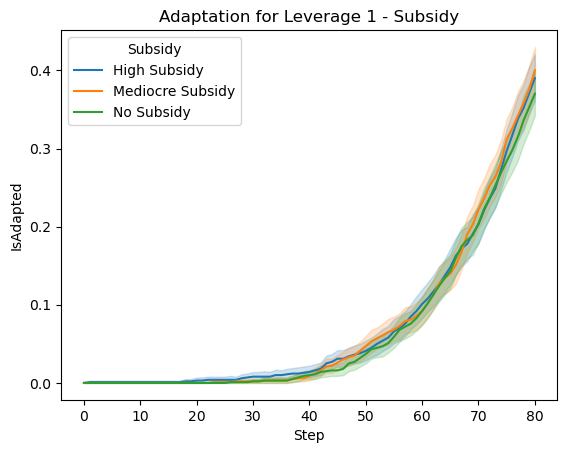

In [78]:
g = sns.lineplot(
    data=base.loc[base['policy']==1.0], #set policy to 1 for good result
    x="Step",
    y='IsAdapted',
    errorbar=("ci", 95),
    hue="Subsidy",
    palette="tab10"  
)
g.set(title='Adaptation for Leverage 1 - Subsidy')
g.figure.savefig("AdaptationSubsidy.png")

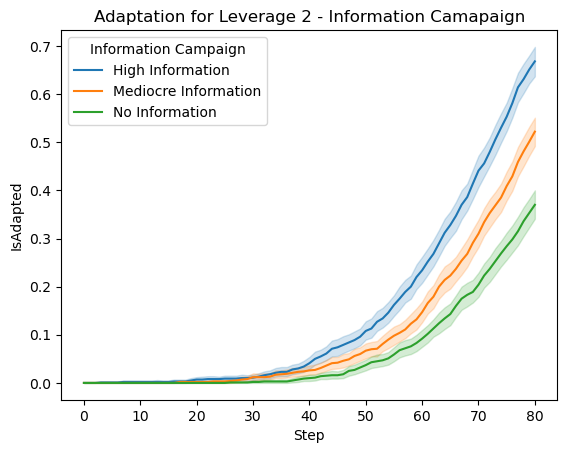

In [79]:
g = sns.lineplot(
    data=base.loc[base['I_threshold']==50000], #set policy to 1 for good result
    x="Step",
    y='IsAdapted',
    errorbar=("ci", 95),
    hue="Information Campaign",
    palette="tab10"  
)
g.set(title='Adaptation for Leverage 2 - Information Camapaign')
g.figure.savefig("AdaptationInformatino.png")

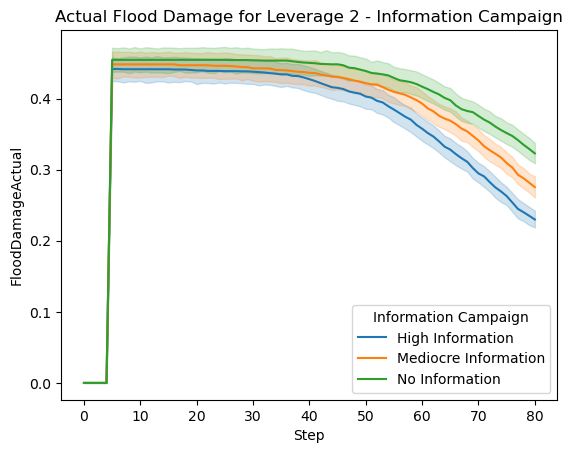

In [82]:
g = sns.lineplot(
    data=base.loc[base['I_threshold']==50000], #set policy to 1 for good result
    x="Step",
    y='FloodDamageActual',
    errorbar=("ci", 95),
    hue="Information Campaign",
    palette="tab10"  
)
g.set(title='Actual Flood Damage for Leverage 2 - Information Campaign')
g.figure.savefig("FloodDamageInformation.png")

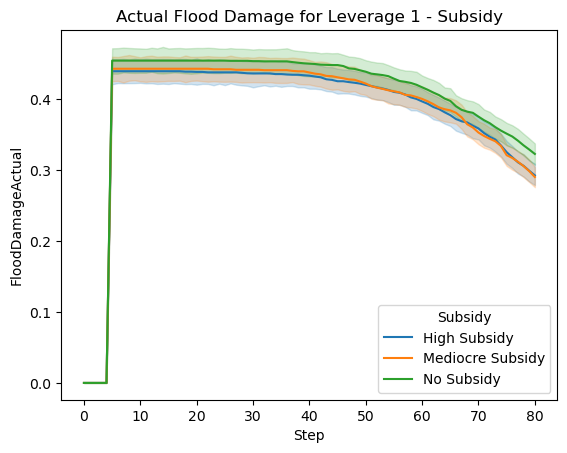

In [83]:
g = sns.lineplot(
    data=base.loc[base['policy']==1.0], #set policy to 1 for good result
    x="Step",
    y='FloodDamageActual',
    errorbar=("ci", 95),
    hue="Subsidy",
    palette="tab10"  
)
g.set(title='Actual Flood Damage for Leverage 1 - Subsidy')
g.figure.savefig("FloodDamageSubsidy.png")

##### Analysis for joint Policy

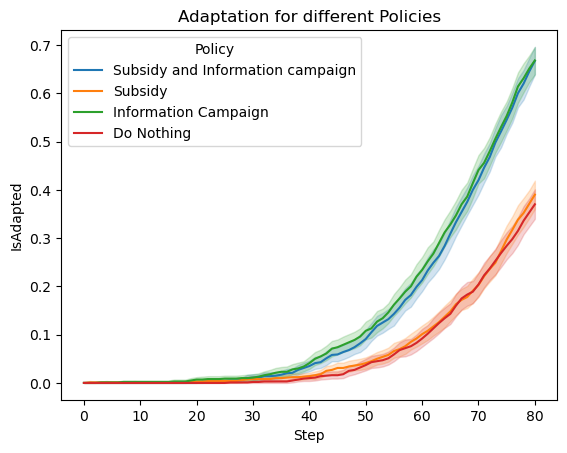

In [90]:
g = sns.lineplot(
    data=base.loc[base['Policy']!='No Policy'], #set policy to 1 for good result
    x="Step",
    y='IsAdapted',
    errorbar=("ci", 95),
    hue="Policy",
    palette="tab10"  
)
g.set(title='Adaptation for different Policies')
g.figure.savefig("Adaptation_Policy.png")

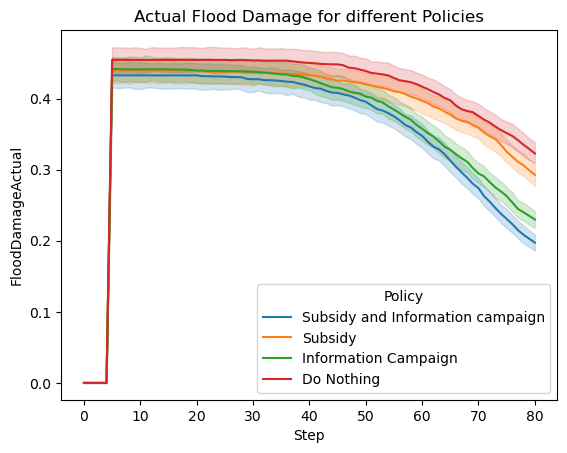

In [89]:
g = sns.lineplot(
    data=base.loc[base['Policy']!='No Policy'], #set policy to 1 for good result
    x="Step",
    y='FloodDamageActual',
    errorbar=("ci", 95),
    hue="Policy",
    palette="tab10"  
)
g.set(title='Actual Flood Damage for different Policies')
g.figure.savefig("FloodDamage_Policy.png")

##### Analysis on the socioeconomic Experiments

[Text(0.5, 1.0, 'Adaptation in Socio Economic Region 1')]

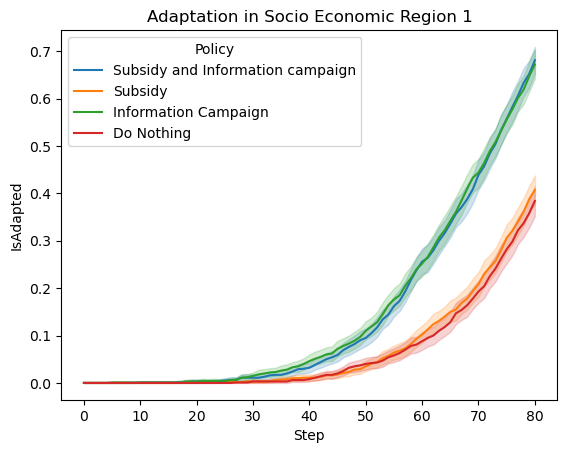

In [91]:
g = sns.lineplot(
    data=socio1.loc[socio1['Policy']!='No Policy'],
    x="Step",
    y='IsAdapted',
    errorbar=("ci", 95),
    hue="Policy",
    palette="tab10"  
)
g.set(title='Adaptation in Urban Region (SocioEconomic1)')
g.figure.savefig("AdaptationUrban.png")

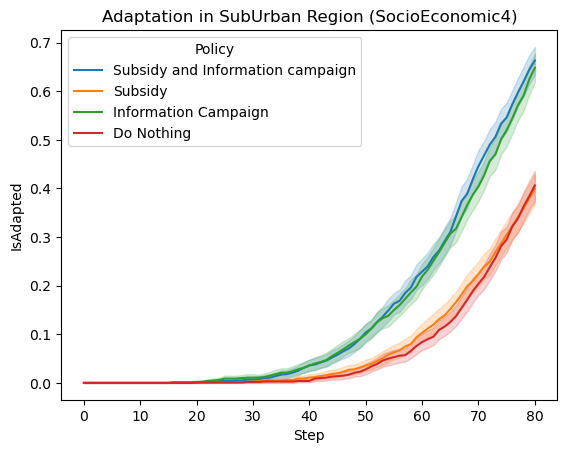

In [92]:
g = sns.lineplot(
    data=socio4.loc[socio4['Policy']!='No Policy'],
    x="Step",
    y='IsAdapted',
    errorbar=("ci", 95),
    hue="Policy",
    palette="tab10"  
)
g.set(title='Adaptation in SubUrban Region (SocioEconomic4)')
g.figure.savefig("AdaptationSubUrban.png")

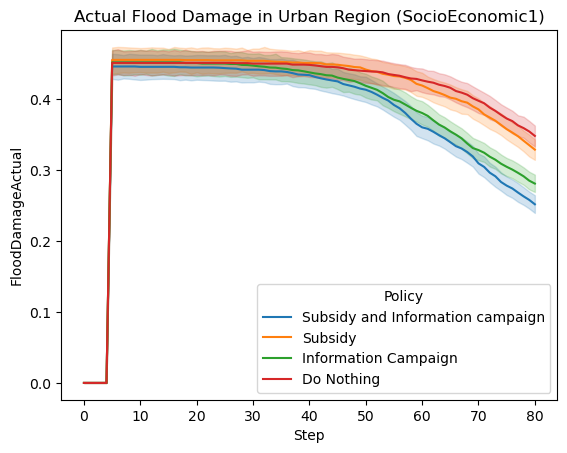

In [93]:
g = sns.lineplot(
    data=socio1.loc[socio1['Policy']!='No Policy'],
    x="Step",
    y='FloodDamageActual',
    errorbar=("ci", 95),
    hue="Policy",
    palette="tab10"  
)
g.set(title='Actual Flood Damage in Urban Region (SocioEconomic1)')
g.figure.savefig("FloodDamageUrban.png")

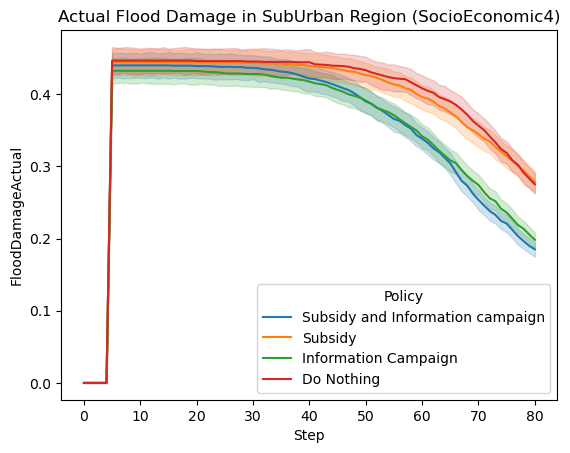

In [94]:
g = sns.lineplot(
    data=socio4.loc[socio4['Policy']!='No Policy'],
    x="Step",
    y='FloodDamageActual',
    errorbar=("ci", 95),
    hue="Policy",
    palette="tab10"  
)
g.set(title='Actual Flood Damage in SubUrban Region (SocioEconomic4)')
g.figure.savefig("FloodDamageSubUrban.png")

### Define KPIs 

In [95]:
#measure in last Step
last = results.loc[results['Step']==80]

In [98]:
last.groupby(by='Policy')['FloodDamageActual'].mean()

Policy
Do Nothing                          0.311652
Information Campaign                0.237129
No Policy                           0.264145
Subsidy                             0.300094
Subsidy and Information campaign    0.217029
Name: FloodDamageActual, dtype: float64

<Axes: >

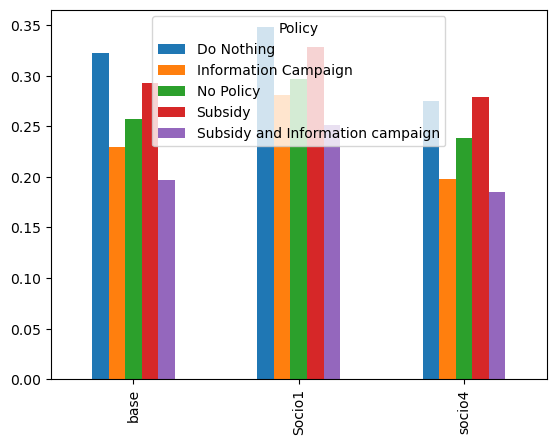

In [111]:
baselast = base.loc[base['Step']==80]
socio1last = socio1.loc[socio1['Step']==80]
socio4last = socio4.loc[socio4['Step']==80]
fb = baselast.groupby(by='Policy')['FloodDamageActual'].mean()
f1 = socio1last.groupby(by='Policy')['FloodDamageActual'].mean()
f2 = socio4last.groupby(by='Policy')['FloodDamageActual'].mean()
flooddamage = pd.DataFrame({"base": fb, "Socio1": f1, "socio4": f2}).T
flooddamage.plot(kind='bar')

In [51]:
def plot_actions(df):
    a = df.loc[df['Step']==40]
    a1 = [a[a['Self_Adaption'] == 0]['Self_Adaption'].count()/4500,a[a['Self_Adaption'] == 1]['Self_Adaption'].count()/4500, a[a['Self_Adaption'] == 2]['Self_Adaption'].count()/4500, a[a['Self_Adaption'] == 3]['Self_Adaption'].count()/4500,a[a['Self_Adaption'] == 4]['Self_Adaption'].count()/4500] 
    b = df.loc[df['Step']==60]
    b1 = [b[b['Self_Adaption'] == 0]['Self_Adaption'].count()/4500,b[b['Self_Adaption'] == 1]['Self_Adaption'].count()/4500, b[b['Self_Adaption'] == 2]['Self_Adaption'].count()/4500, b[b['Self_Adaption'] == 3]['Self_Adaption'].count()/4500,b[b['Self_Adaption'] == 4]['Self_Adaption'].count()/4500] 
    c = df.loc[df['Step']==80]
    c1 = [c[c['Self_Adaption'] == 0]['Self_Adaption'].count()/4500,c[c['Self_Adaption'] == 1]['Self_Adaption'].count()/4500, c[c['Self_Adaption'] == 2]['Self_Adaption'].count()/4500, c[c['Self_Adaption'] == 3]['Self_Adaption'].count()/4500,c[c['Self_Adaption'] == 4]['Self_Adaption'].count()/4500]
    
    adaptation = pd.DataFrame({"Step40": a1, "Step60": b1, "Step80": c1})
    ax = adaptation.plot.bar()  
    actions = ['Do Nothing', 'Insurance', 'Structural', 'Adaptive Building use', 'Flood Barrier']
    ax.set_ylabel('Percent')
    ax.set_xticklabels(actions)
    ax.set_title('Flood Actions taken at specific time step ')

4500

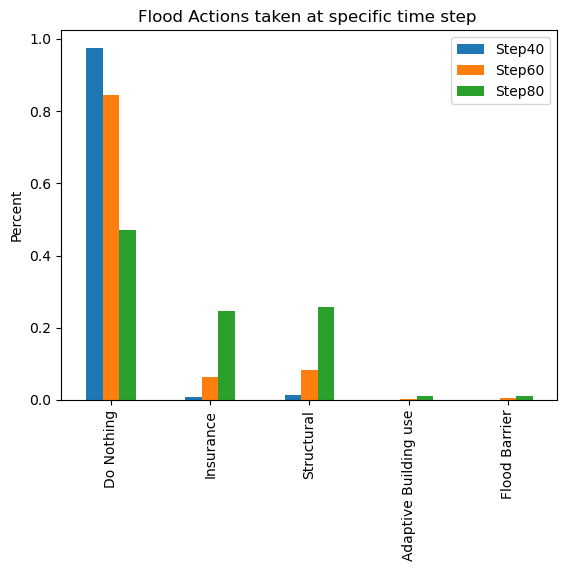

In [52]:
plot_actions(socio4)
socio4.loc[socio4['Step']==40].shape[0]

In [ ]:
def plot_actions(df):
    b = df.loc[df['Step']==50]['Self_Adaption'].value_counts()/df.loc[df['Step']==10].shape[0]
    c = df.loc[df['Step']==70]['Self_Adaption'].value_counts()/df.loc[df['Step']==10].shape[0]
    d = df.loc[df['Step']==80]['Self_Adaption'].value_counts()/df.loc[df['Step']==10].shape[0]

    adaptation = pd.DataFrame({"Step10": b, "Step15": c, "Step20": d})
    ax = adaptation.plot.bar()  
    actions = ['Do Nothing', 'Insurance', 'Structural', 'Adaptive Building use', 'Flood Barrier']
    ax.set_ylabel('Percent')
    ax.set_xticklabels(actions)

<Axes: >

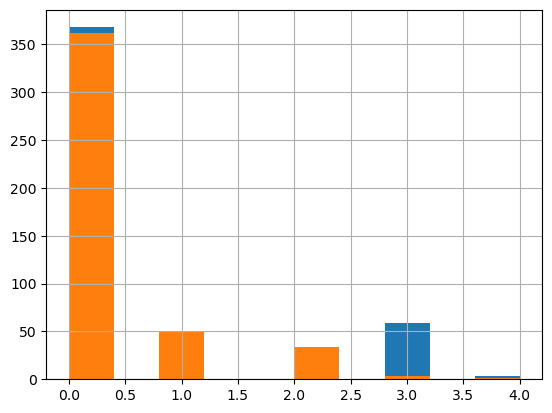

In [ ]:
df = socio1
df.loc[df['Step']==50]['Self_Adaption'].value_counts().index
df.loc[df['Step']==50]['Self_Adaption'].value_counts()/df.loc[df['Step']==10].shape[0]

df.loc[df['Step']==79]['Self_Adaption'].hist()
df=socio4
df.loc[df['Step']==79]['Self_Adaption'].hist()

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (5).

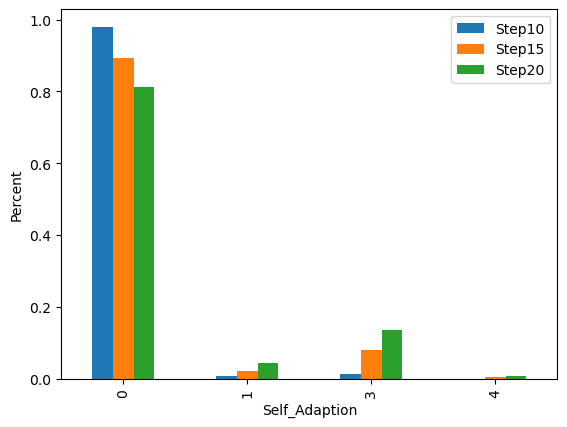

In [ ]:
plot_actions(socio1)

In [ ]:
#results.loc[results['Step']==10]['Self_Adaption']
#results.loc[results['Step']==19]['Self_Adaption']
# agent_data.iloc[-500:-451]['Self_Adaption'].hist()
# plt.ylabel('Agents')
# plt.xlabel('Flood Measurement')
# plt.title('Flood measurement active (Step10)')

#a = results_filtered.loc[results_filtered['Step']==5]['Self_Adaption'].value_counts()
b = results.loc[results['Step']==50]['Self_Adaption'].value_counts()/results_filtered.loc[results_filtered['Step']==10].shape[0]
c = results.loc[results['Step']==70]['Self_Adaption'].value_counts()/results_filtered.loc[results_filtered['Step']==10].shape[0]
d = results.loc[results_filtered['Step']==80]['Self_Adaption'].value_counts()/results_filtered.loc[results_filtered['Step']==10].shape[0]

adaptation = pd.DataFrame({"Step10": b, "Step15": c, "Step20": d})
ax = adaptation.plot.bar()
actions = ['Do Nothing', 'Insurance', 'Structural', 'Adaptive Building use', 'Flood Barrier']
ax.set_ylabel('Percent')
ax.set_xticklabels(actions)

In [ ]:
results_nopolicy.loc[(results_nopolicy['age_mean']==30) & ((results_nopolicy['income_mean']==50000))]


iteration  Step  AgentID  age_mean  income_mean     Worry  \
4050            0     0        0        30        50000  0.046788   
4051            0     0        1        30        50000  0.000000   
4052            0     0        2        30        50000  0.351729   
4053            0     0        3        30        50000  0.000000   
4054            0     0        4        30        50000  0.000000   
...           ...   ...      ...       ...          ...       ...   
336145          9    80       45        30        50000  0.880000   
336146          9    80       46        30        50000  0.800000   
336147          9    80       47        30        50000  1.040000   
336148          9    80       48        30        50000  0.740000   
336149          9    80       49        30        50000  0.460000   

        FloodDamageActual  IsAdapted  Self_Adaption  Cum_Invest  
4050             0.000000      False              0         0.0  
4051             0.000000      False              0         0.0  
4052             0.000000      False              0         0.0  
4053             0.000000      False              0         0.0  
4054             0.000000      False              0         0.0  
...                   ...        ...            ...         ...  
336145           0.000000       True              3         4.0  
336146           0.102221       True              1         0.8  
336147           0.519575       True              3         2.4  
336148           0.337340       True              3         1.6  
336149           0.000000       True              3         1.6  

[40500 rows x 10 columns]

# Running the model and visualizing the model domain and social network over time

In [ ]:


# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz", I_threshold=50000, policy=1.0, age_mean =40, income_mean= ) # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()



SyntaxError: invalid syntax (762557390.py, line 2)

In [ ]:
#this is a function for running and plotting and eventually storing KPIs and so on 
import mesa
params = {'number_of_households':50, 'flood_map_choice':"harvey", 'network':"watts_strogatz", 'I_threshold':50000, 'policy':1.0, 'age_mean':[35,40,45], 'income_mean': [25000,50000, 100000]}
scenario = 'Government support'
def runandplot(params = params, scenario = scenario): 
    results = mesa.batch_run(
        AdaptationModel,
        parameters=params,
        iterations=10,
        max_steps=80,
        number_processes=1,
        data_collection_period=1,  # Important, otherwise the datacollector will only collect data of the last time step
        display_progress=True,
    )
    results

    results_df = pd.DataFrame(results)
    print(f"Column names in the dataframe: {results_df.columns.tolist()}")
    results_filtered  = results_df[['iteration', 'Step','AgentID', 'age_mean', 'income_mean','Worry', 'FloodDamageActual', 'IsAdapted', 'Self_Adaption', 'Cum_Invest']].reset_index(drop=True)
    results_filtered.head(5)
    #filter for one agent 0 
    results_agent_filtered = results_df[(results_df.AgentID == 0)]
    results_agent_filtered
    # result_agent_long = results_agent_filtered.T.unstack().reset_index()
    # result_agent_long.columns = ["Step", "AgentID", "Variable", "Value"]
    # result_agent_long
    results_filtered
    g = sns.lineplot(
        data=results_agent_filtered,
        x="Step",
        y="IsAdapted",
        errorbar=("ci", 95),
        hue="age_mean",
        palette="tab10"
    )

100%|██████████| 90/90 [00:28<00:00,  3.13it/s]


Column names in the dataframe: ['RunId', 'iteration', 'Step', 'number_of_households', 'flood_map_choice', 'network', 'I_threshold', 'policy', 'age_mean', 'income_mean', 'total_adapted_households', 'AgentID', 'FloodDepthEstimated', 'FloodDamageEstimated', 'FloodDepthActual', 'FloodDamageActual', 'IsAdapted', 'FriendsCount', 'location', 'Worry', 'Self_Adaption', 'Self_Investment', 'Cum_Invest', 'Neighbours', 'Income', 'Age', 'Costs', 'W2P']


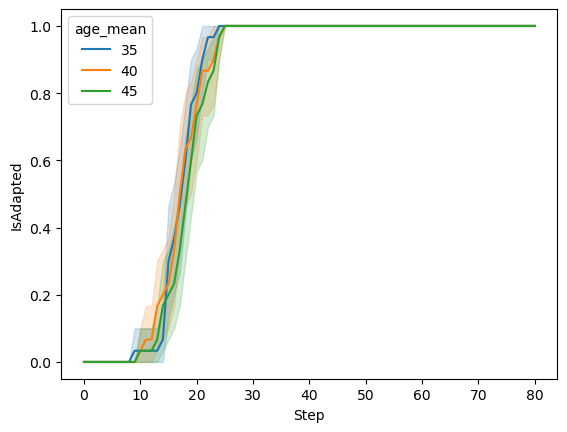

In [ ]:
import mesa

In [ ]:
params = {'number_of_households':50, 'flood_map_choice':"harvey", 'network':"watts_strogatz", 'I_threshold':50000, 'policy':1.0, 'age_mean':[35,40,45], 'income_mean': [25000,50000, 100000}

In [ ]:
results = mesa.batch_run(
    AdaptationModel,
    parameters=params,
    iterations=10,
    max_steps=80,
    number_processes=1,
    data_collection_period=1,  # Important, otherwise the datacollector will only collect data of the last time step
    display_progress=True,
)

100%|██████████| 30/30 [00:08<00:00,  3.38it/s]


In [ ]:
results

[{'RunId': 0,
  'iteration': 0,
  'Step': 0,
  'number_of_households': 50,
  'flood_map_choice': 'harvey',
  'network': 'watts_strogatz',
  'I_threshold': 50000,
  'policy': 1.0,
  'age_mean': 35,
  'income_mean': 50000,
  'total_adapted_households': 0,
  'AgentID': 0,
  'FloodDepthEstimated': 0.3824501,
  'FloodDamageEstimated': 0.4804819734982567,
  'FloodDepthActual': 0,
  'FloodDamageActual': 0,
  'IsAdapted': False,
  'FriendsCount': 5,
  'location': <POINT (264533.491 3290840.659)>,
  'Worry': 0,
  'Self_Adaption': 0,
  'Self_Investment': 0,
  'Cum_Invest': 0,
  'Neighbours': None,
  'Income': 26400.427603605178,
  'Age': 33.38220360004817,
  'Costs': 1,
  'W2P': None},
 {'RunId': 0,
  'iteration': 0,
  'Step': 0,
  'number_of_households': 50,
  'flood_map_choice': 'harvey',
  'network': 'watts_strogatz',
  'I_threshold': 50000,
  'policy': 1.0,
  'age_mean': 35,
  'income_mean': 50000,
  'total_adapted_households': 0,
  'AgentID': 1,
  'FloodDepthEstimated': 5.6019173,
  'FloodD

In [ ]:
results_df = pd.DataFrame(results)
print(f"Column names in the dataframe: {results_df.columns.tolist()}")

Column names in the dataframe: ['RunId', 'iteration', 'Step', 'number_of_households', 'flood_map_choice', 'network', 'I_threshold', 'policy', 'age_mean', 'income_mean', 'total_adapted_households', 'AgentID', 'FloodDepthEstimated', 'FloodDamageEstimated', 'FloodDepthActual', 'FloodDamageActual', 'IsAdapted', 'FriendsCount', 'location', 'Worry', 'Self_Adaption', 'Self_Investment', 'Cum_Invest', 'Neighbours', 'Income', 'Age', 'Costs', 'W2P']


In [ ]:
results_filtered  = results_df[['iteration', 'Step','AgentID', 'age_mean', 'income_mean','Worry', 'FloodDamageActual', 'IsAdapted', 'Self_Adaption', 'Cum_Invest']].reset_index(drop=True)
results_filtered.head(5)

iteration  Step  AgentID  age_mean  income_mean    Worry  \
0          0     0        0        35        50000  0.00000   
1          0     0        1        35        50000  0.03077   
2          0     0        2        35        50000  0.00000   
3          0     0        3        35        50000  0.00000   
4          0     0        4        35        50000  0.00000   

   FloodDamageActual  IsAdapted  Self_Adaption  Cum_Invest  
0                0.0      False              0         0.0  
1                0.0      False              0         0.0  
2                0.0      False              0         0.0  
3                0.0      False              0         0.0  
4                0.0      False              0         0.0

In [ ]:
#filter for one agent 0 
results_agent_filtered = results_df[(results_df.AgentID == 0)]

In [ ]:
results_agent_filtered

RunId  iteration  Step  number_of_households flood_map_choice  \
0           0          0     0                    50           harvey   
50          0          0     1                    50           harvey   
100         0          0     2                    50           harvey   
150         0          0     3                    50           harvey   
200         0          0     4                    50           harvey   
...       ...        ...   ...                   ...              ...   
121250     29          9    76                    50           harvey   
121300     29          9    77                    50           harvey   
121350     29          9    78                    50           harvey   
121400     29          9    79                    50           harvey   
121450     29          9    80                    50           harvey   

               network  I_threshold  policy  age_mean  income_mean  ...  \
0       watts_strogatz        50000     1.0        35        50000  ...   
50      watts_strogatz        50000     1.0        35        50000  ...   
100     watts_strogatz        50000     1.0        35        50000  ...   
150     watts_strogatz        50000     1.0        35        50000  ...   
200     watts_strogatz        50000     1.0        35        50000  ...   
...                ...          ...     ...       ...          ...  ...   
121250  watts_strogatz        50000     1.0        45        50000  ...   
121300  watts_strogatz        50000     1.0        45        50000  ...   
121350  watts_strogatz        50000     1.0        45        50000  ...   
121400  watts_strogatz        50000     1.0        45        50000  ...   
121450  watts_strogatz        50000     1.0        45        50000  ...   

                                            location  Worry  Self_Adaption  \
0       POINT (264533.4910025474 3290840.6590321814)   0.00              0   
50      POINT (264533.4910025474 3290840.6590321814)   0.03              0   
100     POINT (264533.4910025474 3290840.6590321814)   0.06              0   
150     POINT (264533.4910025474 3290840.6590321814)   0.09              0   
200     POINT (264533.4910025474 3290840.6590321814)   0.12              0   
...                                              ...    ...            ...   
121250  POINT (227869.53013474282 3340203.316289149)   0.39              3   
121300  POINT (227869.53013474282 3340203.316289149)   0.39              3   
121350  POINT (227869.53013474282 3340203.316289149)   0.39              3   
121400  POINT (227869.53013474282 3340203.316289149)   0.39              3   
121450  POINT (227869.53013474282 3340203.316289149)   0.39              3   

        Self_Investment  Cum_Invest  Neighbours        Income        Age  \
0                   0.0         0.0        None  26400.427604  33.382204   
50                  0.0         0.0        None  26400.427604  33.382204   
100                 0.0         0.0        None  26400.427604  33.382204   
150                 0.0         0.0        None  26400.427604  33.382204   
200                 0.0         0.0        None  26400.427604  33.382204   
...                 ...         ...         ...           ...        ...   
121250              0.4         2.6        None  49554.516250  42.979137   
121300              0.4         2.6        None  49554.516250  42.979137   
121350              0.4         2.6        None  49554.516250  42.979137   
121400              0.4         2.6        None  49554.516250  42.979137   
121450              0.4         2.6        None  49554.516250  42.979137   

       Costs   W2P  
0       1.00  None  
50      1.00  None  
100     1.00  None  
150     1.00  None  
200     1.00  None  
...      ...   ...  
121250  0.22  None  
121300  0.22  None  
121350  0.22  None  
121400  0.22  None  
121450  0.22  None  

[2430 rows x 28 columns]

In [ ]:
# result_agent_long = results_agent_filtered.T.unstack().reset_index()
# result_agent_long.columns = ["Step", "AgentID", "Variable", "Value"]
# result_agent_long

ValueError: Length mismatch: Expected axis has 3 elements, new values have 4 elements

In [ ]:
results_filtered

iteration  Step  AgentID  age_mean  income_mean    Worry  \
0               0     0        0        35        50000  0.00000   
1               0     0        1        35        50000  0.03077   
2               0     0        2        35        50000  0.00000   
3               0     0        3        35        50000  0.00000   
4               0     0        4        35        50000  0.00000   
...           ...   ...      ...       ...          ...      ...   
121495          9    80       45        45        50000  0.52000   
121496          9    80       46        45        50000  0.63000   
121497          9    80       47        45        50000  0.55000   
121498          9    80       48        45        50000  0.51000   
121499          9    80       49        45        50000  0.43000   

        FloodDamageActual  IsAdapted  Self_Adaption  Cum_Invest  
0                0.000000      False              0         0.0  
1                0.000000      False              0         0.0  
2                0.000000      False              0         0.0  
3                0.000000      False              0         0.0  
4                0.000000      False              0         0.0  
...                   ...        ...            ...         ...  
121495           0.390672       True              4         1.8  
121496           0.336510       True              3         1.2  
121497           0.116548       True              1         1.8  
121498           0.278958       True              3         1.6  
121499           0.397068       True              4         2.8  

[121500 rows x 10 columns]

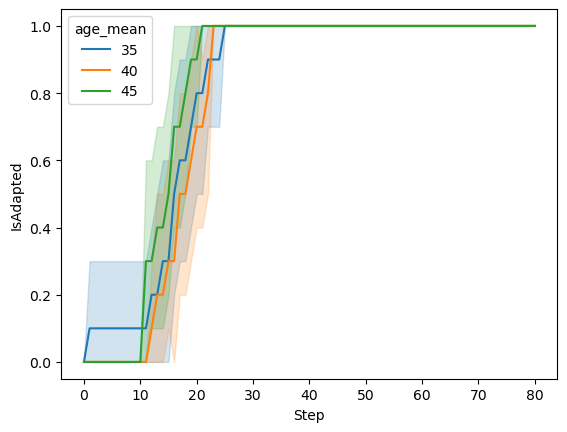

In [ ]:
g = sns.lineplot(
    data=results_agent_filtered,
    x="Step",
    y="IsAdapted",
    errorbar=("ci", 95),
    hue="age_mean",
    palette="tab10",
)

In [ ]:
params_income = {'number_of_households':50, 'flood_map_choice':"harvey", 'network':"watts_strogatz", 'I_threshold':50000, 'policy':1.0, 'age_mean':40, 'income_mean': [25000,50000, 100000]}

In [ ]:
results = mesa.batch_run(
    AdaptationModel,
    parameters=params_income,
    iterations=10,
    max_steps=20,
    number_processes=1,
    data_collection_period=1,  # Important, otherwise the datacollector will only collect data of the last time step
    display_progress=True,
)

100%|██████████| 30/30 [00:03<00:00,  9.76it/s]


In [ ]:
results;

[{'RunId': 0,
  'iteration': 0,
  'Step': 0,
  'number_of_households': 50,
  'flood_map_choice': 'harvey',
  'network': 'watts_strogatz',
  'I_threshold': 50000,
  'policy': 1.0,
  'age_mean': 40,
  'income_mean': 25000,
  'total_adapted_households': 0,
  'AgentID': 0,
  'FloodDepthEstimated': 0,
  'FloodDamageEstimated': 0,
  'FloodDepthActual': 0,
  'FloodDamageActual': 0,
  'IsAdapted': False,
  'FriendsCount': 3,
  'location': <POINT (217779.376 3350195.647)>,
  'Worry': 0.28533432510924367,
  'Self_Adaption': 0,
  'Self_Investment': 0,
  'Cum_Invest': 0,
  'Neighbours': None,
  'Income': 26194.2050308092,
  'Age': 46.36132888365726,
  'Costs': 1,
  'W2P': None},
 {'RunId': 0,
  'iteration': 0,
  'Step': 0,
  'number_of_households': 50,
  'flood_map_choice': 'harvey',
  'network': 'watts_strogatz',
  'I_threshold': 50000,
  'policy': 1.0,
  'age_mean': 40,
  'income_mean': 25000,
  'total_adapted_households': 0,
  'AgentID': 1,
  'FloodDepthEstimated': 0.45812607,
  'FloodDamageEst

In [ ]:
results_df = pd.DataFrame(results)
print(f"Column names in the dataframe: {results_df.columns.tolist()}");

Column names in the dataframe: ['RunId', 'iteration', 'Step', 'number_of_households', 'flood_map_choice', 'network', 'I_threshold', 'policy', 'age_mean', 'income_mean', 'total_adapted_households', 'AgentID', 'FloodDepthEstimated', 'FloodDamageEstimated', 'FloodDepthActual', 'FloodDamageActual', 'IsAdapted', 'FriendsCount', 'location', 'Worry', 'Self_Adaption', 'Self_Investment', 'Cum_Invest', 'Neighbours', 'Income', 'Age', 'Costs', 'W2P']


In [ ]:
results_filtered  = results_df[['iteration', 'Step','AgentID', 'age_mean', 'income_mean', 'I_threshold', 'policy','Worry', 'FloodDamageActual', 'IsAdapted', 'Self_Adaption', 'Cum_Invest']].reset_index(drop=True)
results_filtered.head(5);

iteration  Step  AgentID  age_mean  income_mean     Worry  \
0          0     0        0        40        25000  0.285334   
1          0     0        1        40        25000  0.164073   
2          0     0        2        40        25000  0.154462   
3          0     0        3        40        25000  0.341108   
4          0     0        4        40        25000  0.144686   

   FloodDamageActual  IsAdapted  Self_Adaption  Cum_Invest  
0                0.0      False              0         0.0  
1                0.0      False              0         0.0  
2                0.0      False              0         0.0  
3                0.0      False              0         0.0  
4                0.0      False              0         0.0

In [ ]:
#filter for one agent 0 
results_agent_filtered = results_df[(results_df.AgentID == 0)]

In [ ]:
results_agent_filtered;

RunId  iteration  Step  number_of_households flood_map_choice  \
0          0          0     0                    50           harvey   
50         0          0     1                    50           harvey   
100        0          0     2                    50           harvey   
150        0          0     3                    50           harvey   
200        0          0     4                    50           harvey   
...      ...        ...   ...                   ...              ...   
31250     29          9    16                    50           harvey   
31300     29          9    17                    50           harvey   
31350     29          9    18                    50           harvey   
31400     29          9    19                    50           harvey   
31450     29          9    20                    50           harvey   

              network  I_threshold  policy  age_mean  income_mean  ...  \
0      watts_strogatz        50000     1.0        40        25000  ...   
50     watts_strogatz        50000     1.0        40        25000  ...   
100    watts_strogatz        50000     1.0        40        25000  ...   
150    watts_strogatz        50000     1.0        40        25000  ...   
200    watts_strogatz        50000     1.0        40        25000  ...   
...               ...          ...     ...       ...          ...  ...   
31250  watts_strogatz        50000     1.0        40       100000  ...   
31300  watts_strogatz        50000     1.0        40       100000  ...   
31350  watts_strogatz        50000     1.0        40       100000  ...   
31400  watts_strogatz        50000     1.0        40       100000  ...   
31450  watts_strogatz        50000     1.0        40       100000  ...   

                                            location     Worry  Self_Adaption  \
0      POINT (217779.37602367697 3350195.6471439693)  0.285334              0   
50     POINT (217779.37602367697 3350195.6471439693)  0.315334              0   
100    POINT (217779.37602367697 3350195.6471439693)  0.345334              0   
150    POINT (217779.37602367697 3350195.6471439693)  0.375334              0   
200    POINT (217779.37602367697 3350195.6471439693)  0.405334              0   
...                                              ...       ...            ...   
31250   POINT (254608.01613546003 3313888.755870577)  0.528890              0   
31300   POINT (254608.01613546003 3313888.755870577)  0.100000              1   
31350   POINT (254608.01613546003 3313888.755870577)  0.130000              1   
31400   POINT (254608.01613546003 3313888.755870577)  0.130000              1   
31450   POINT (254608.01613546003 3313888.755870577)  0.130000              1   

       Self_Investment  Cum_Invest  Neighbours         Income        Age  \
0                  0.0         0.0        None   26194.205031  46.361329   
50                 0.0         0.0        None   26194.205031  46.361329   
100                0.0         0.0        None   26194.205031  46.361329   
150                0.0         0.0        None   26194.205031  46.361329   
200                0.0         0.0        None   26194.205031  46.361329   
...                ...         ...         ...            ...        ...   
31250              0.0         1.6        None  143035.505034  43.176950   
31300              0.8         1.6        None  143035.505034  43.176950   
31350              0.8         3.0        None  143035.505034  43.176950   
31400              0.8         3.0        None  143035.505034  43.176950   
31450              0.8         3.0        None  143035.505034  43.176950   

      Costs   W2P  
0      1.00  None  
50     1.00  None  
100    1.00  None  
150    1.00  None  
200    1.00  None  
...     ...   ...  
31250  0.52  None  
31300  0.52  None  
31350  0.10  None  
31400  0.10  None  
31450  0.10  None  

[630 rows x 28 columns]

In [ ]:
# result_agent_long = results_agent_filtered.T.unstack().reset_index()
# result_agent_long.columns = ["Step", "AgentID", "Variable", "Value"]
# result_agent_long

In [ ]:
results_filtered

iteration  Step  AgentID  age_mean  income_mean     Worry  \
0              0     0        0        40        25000  0.285334   
1              0     0        1        40        25000  0.164073   
2              0     0        2        40        25000  0.154462   
3              0     0        3        40        25000  0.341108   
4              0     0        4        40        25000  0.144686   
...          ...   ...      ...       ...          ...       ...   
31495          9    20       45        40       100000  0.260000   
31496          9    20       46        40       100000  0.460000   
31497          9    20       47        40       100000  0.100000   
31498          9    20       48        40       100000  0.260000   
31499          9    20       49        40       100000  0.190000   

       FloodDamageActual  IsAdapted  Self_Adaption  Cum_Invest  
0               0.000000      False              0         0.0  
1               0.000000      False              0         0.0  
2               0.000000      False              0         0.0  
3               0.000000      False              0         0.0  
4               0.000000      False              0         0.0  
...                  ...        ...            ...         ...  
31495           0.000000       True              2         3.2  
31496           0.176802       True              1         2.0  
31497           0.124675       True              1         3.8  
31498           0.000000       True              2         2.4  
31499           0.088877       True              1         3.8  

[31500 rows x 10 columns]

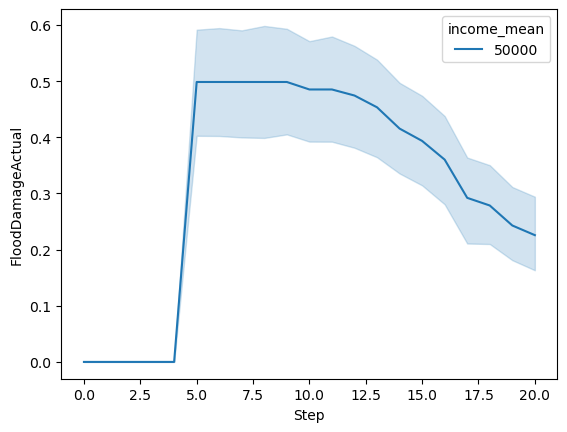

In [ ]:
g = sns.lineplot(
    data=results_agent_filtered,
    x="Step",
    y='FloodDamageActual',
    errorbar=("ci", 95),
    hue="income_mean",
    palette="tab10",
)

100%|██████████| 30/30 [00:03<00:00,  8.98it/s]


Column names in the dataframe: ['RunId', 'iteration', 'Step', 'number_of_households', 'flood_map_choice', 'network', 'I_threshold', 'policy', 'age_mean', 'income_mean', 'total_adapted_households', 'AgentID', 'FloodDepthEstimated', 'FloodDamageEstimated', 'FloodDepthActual', 'FloodDamageActual', 'IsAdapted', 'FriendsCount', 'location', 'Worry', 'Self_Adaption', 'Self_Investment', 'Cum_Invest', 'Neighbours', 'Income', 'Age', 'Costs', 'W2P']


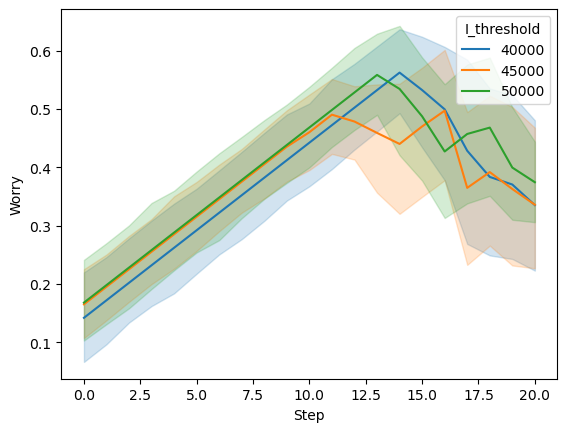

In [ ]:
params_i_threshold = {'number_of_households':50, 'flood_map_choice':"harvey", 'network':"watts_strogatz", 'I_threshold':[40000,45000,50000], 'policy':1.0, 'age_mean':40, 'income_mean': 50000}
results = mesa.batch_run(
    AdaptationModel,
    parameters=params_i_threshold,
    iterations=10,
    max_steps=20,
    number_processes=1,
    data_collection_period=1,  # Important, otherwise the datacollector will only collect data of the last time step
    display_progress=True,
)
results;
results_df = pd.DataFrame(results)
print(f"Column names in the dataframe: {results_df.columns.tolist()}");
results_filtered  = results_df[['iteration', 'Step','AgentID', 'age_mean', 'income_mean', 'I_threshold', 'policy','Worry', 'FloodDamageActual', 'IsAdapted', 'Self_Adaption', 'Cum_Invest']].reset_index(drop=True)
results_filtered.head(5);
#filter for one agent 0 
results_agent_filtered = results_df[(results_df.AgentID == 0)]
results_agent_filtered;
# result_agent_long = results_agent_filtered.T.unstack().reset_index()
# result_agent_long.columns = ["Step", "AgentID", "Variable", "Value"]
# result_agent_long
results_filtered


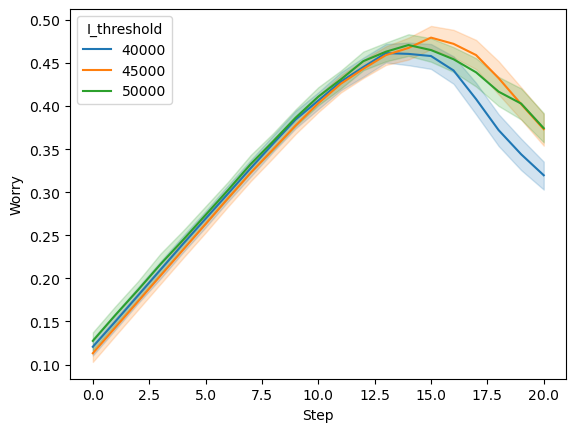

In [ ]:

g = sns.lineplot(
    data=results_filtered,
    x="Step",
    y="Worry",
    errorbar=("ci", 95),
    hue="I_threshold",
    palette="tab10",
)

[Text(0, 0, 'Do Nothing'),
 Text(1, 0, 'Insurance'),
 Text(2, 0, 'Structural'),
 Text(3, 0, 'Adaptive Building use'),
 Text(4, 0, 'Flood Barrier')]

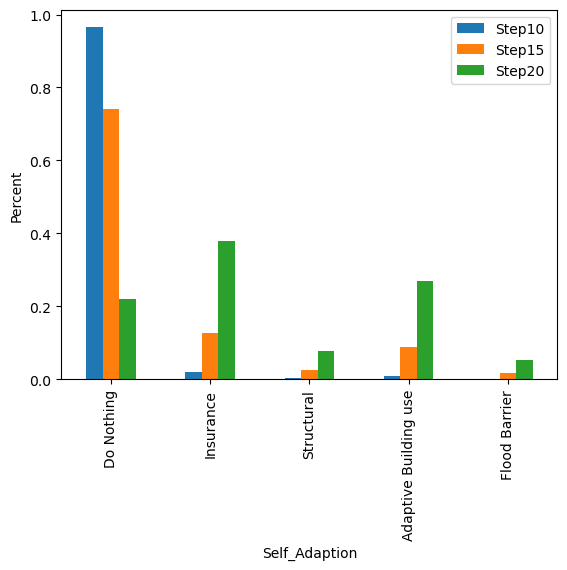

In [ ]:
results_filtered.loc[results_filtered['Step']==10]['Self_Adaption']
results_filtered.loc[results_filtered['Step']==19]['Self_Adaption']
# agent_data.iloc[-500:-451]['Self_Adaption'].hist()
# plt.ylabel('Agents')
# plt.xlabel('Flood Measurement')
# plt.title('Flood measurement active (Step10)')

#a = results_filtered.loc[results_filtered['Step']==5]['Self_Adaption'].value_counts()
b = results_filtered.loc[results_filtered['Step']==10]['Self_Adaption'].value_counts()/results_filtered.loc[results_filtered['Step']==10].shape[0]
c = results_filtered.loc[results_filtered['Step']==15]['Self_Adaption'].value_counts()/results_filtered.loc[results_filtered['Step']==10].shape[0]
d = results_filtered.loc[results_filtered['Step']==20]['Self_Adaption'].value_counts()/results_filtered.loc[results_filtered['Step']==10].shape[0]

adaptation = pd.DataFrame({"Step10": b, "Step15": c, "Step20": d})
ax = adaptation.plot.bar()
actions = ['Do Nothing', 'Insurance', 'Structural', 'Adaptive Building use', 'Flood Barrier']
ax.set_ylabel('Percent')
ax.set_xticklabels(actions)

TypeError: Axes.bar() missing 1 required positional argument: 'height'

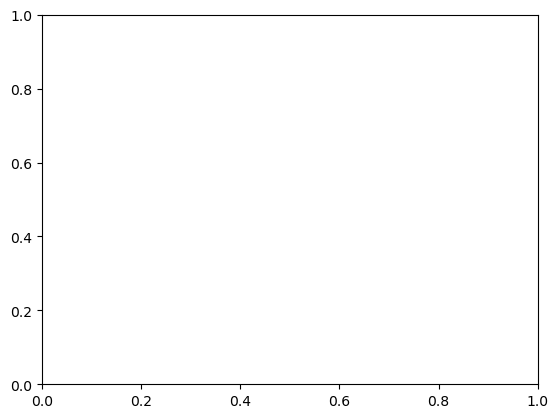

In [ ]:
f, ax = plt.subplots()

ax.bar(adaptation)

In [ ]:
#random seed blijft het zelfde bij sensitivity analyse
#model = AdaptationModel(number_of_households=50, flood_map_choice="harvey",seed = 42, network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"


# experiment 1
#zelfde paramaters toetsen
result = []


for i in range(100):
    model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"
    for j in range(20):
        model.step()
    output = model.datacollector.get_agent_vars_dataframe()
    output['run_number'] = i
    result.append(output)



In [ ]:
import pandas as pd

ValueError: Must pass 2-d input. shape=(100, 1000, 17)

In [ ]:
result_long = result[0].T.unstack().reset_index()
result_long.columns = ["Step", "AgentID", "Variable", "Value"]
#agent_wealth_long = agent_wealth.T.unstack().reset_index()
#agent_wealth_long.columns = ["Step", "AgentID", "Variable", "Value"]

In [ ]:
result_long.loc[result_long['Variable']=='Worry']

Step  AgentID Variable     Value
7         0        0    Worry  0.216008
24        0        1    Worry  0.181767
41        0        2    Worry  0.262051
58        0        3    Worry  0.179783
75        0        4    Worry   0.33877
...     ...      ...      ...       ...
16922    19       45    Worry      0.31
16939    19       46    Worry      0.57
16956    19       47    Worry      0.33
16973    19       48    Worry  0.624159
16990    19       49    Worry  0.631609

[1000 rows x 4 columns]

C:\Users\thoma\AppData\Local\Temp\ipykernel_6060\2802198739.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(


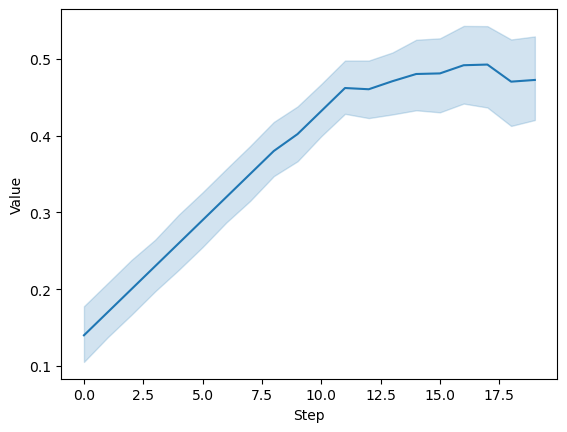

In [ ]:
g = sns.lineplot(
    data=result_long.loc[result_long['Variable']=='Worry'],
    x="Step",
    y="Value",
    errorbar=("ci", 95),
    palette="tab10",
)

In [ ]:
# Create a lineplot with error bars
g = sns.lineplot(
    data=results_5s_df,
    x="Step",
    y="Gini",
    hue="N",
    errorbar=("ci", 95),
    palette="tab10",
)

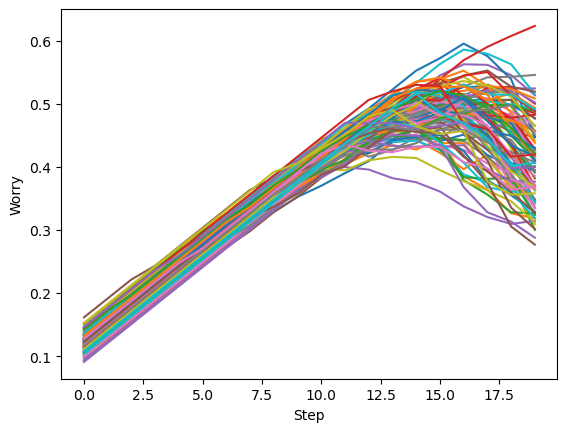

In [ ]:
for run in result:
    sns.lineplot(run['Worry'].groupby('Step').mean())

In [ ]:
result[0]['Worry'].groupby('Step').mean()

Step
0     0.099221
1     0.129221
2     0.159221
3     0.189221
4     0.219221
5     0.249221
6     0.279221
7     0.309221
8     0.328508
9     0.352339
10    0.370003
11    0.389986
12    0.408951
13    0.438951
14    0.464585
15    0.488985
16    0.499626
17    0.498739
18    0.476731
19    0.457147
Name: Worry, dtype: float64

In [ ]:
import pandas as pd

In [ ]:
agent_data = model.datacollector.get_agent_vars_dataframe()
#agent_data['Worry'].describe()
#agent_data.worry 
agent_data['Age'].describe()
agent_data.iloc[-50:-1]['FloodDamageActual'].sum()
#agent_data.to_csv('I=55000')

11.97919862769932

In [ ]:
I_4000= pd.read_csv('I=40000')
I_4500 = pd.read_csv('I=45000')
I_5000 = pd.read_csv('I=50000')
I_5500 = pd.read_csv('I=55000')


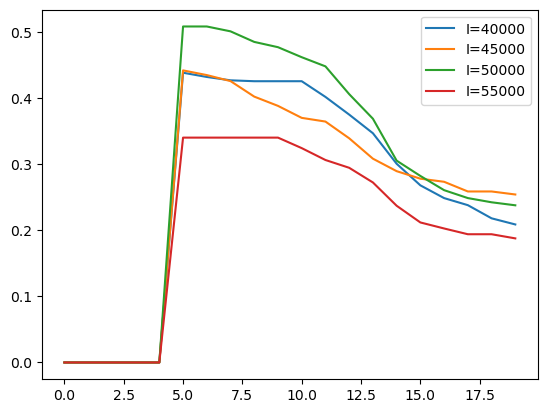

In [ ]:
plt.plot(I_4000.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=40000')
plt.plot(I_4500.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=45000')
plt.plot(I_5000.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=50000')
plt.plot(I_5500.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=55000')
plt.legend()

In [ ]:
agent_data.iloc[-50:-1]['Self_Investment'].mean() #average of self_investment of all agent

0.3551020408163265

In [ ]:
agent_data.iloc[-50:-1]['Cum_Invest'].mean() #average of cumulative neighbor investment of all agents
#lower value probably because some agent do not have neighbors

1.379591836734694

In [ ]:
agent_data.iloc[-50:-1]['Costs'].mean()

0.5861224489795918

In [ ]:
steps = np.arange(0,20)

Text(0.5, 1.0, 'Cumulative Neighbour Invest over Time')

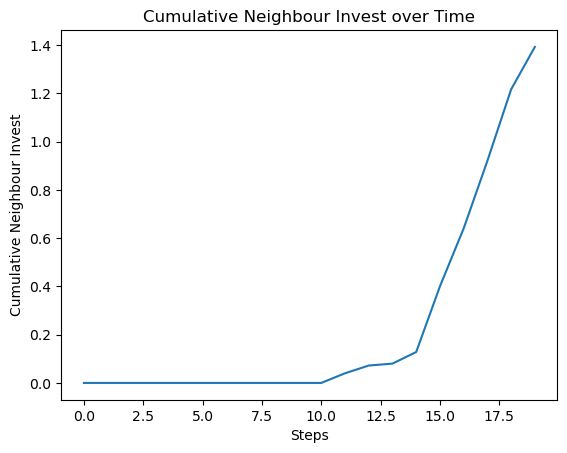

In [ ]:
plt.plot(steps, agent_data.groupby(by='Step')['Cum_Invest'].mean(), label = 'Cumulative Neighbour Invest')
plt.ylabel('Cumulative Neighbour Invest')
plt.xlabel('Steps')
plt.title('Cumulative Neighbour Invest over Time')

Text(0.5, 1.0, 'Self Adaptation')

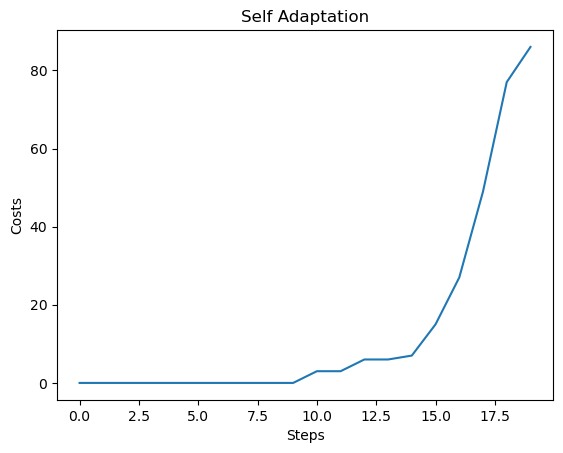

In [ ]:
plt.plot(steps, agent_data.groupby(by='Step')['Self_Adaption'].sum(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Self Adaptation')

Text(0.5, 1.0, 'Costs over Time')

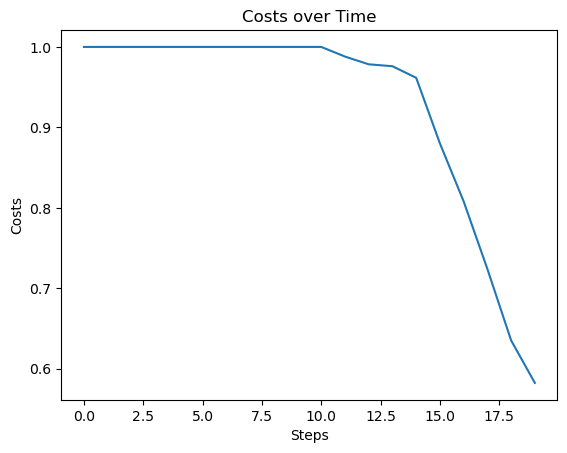

In [ ]:
plt.plot(steps, agent_data.groupby(by='Step')['Costs'].mean(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Costs over Time')

Text(0.5, 1.0, 'Worry over Time')

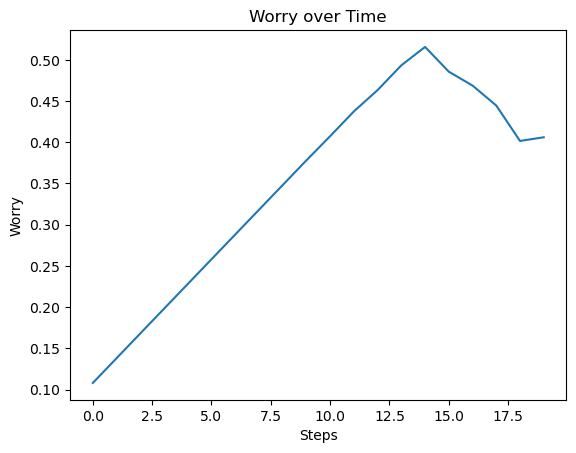

In [ ]:
plt.plot(steps, agent_data.groupby(by='Step')['Worry'].mean(), label='Worry')
plt.ylabel('Worry')
plt.xlabel('Steps')
plt.title('Worry over Time')

Text(0.5, 1.0, 'Flood Damage over Time')

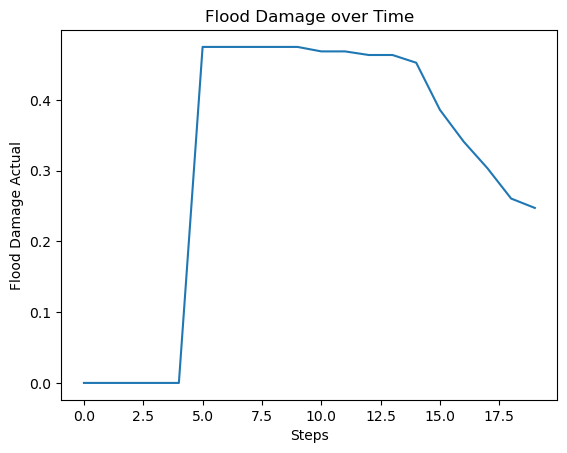

In [ ]:
plt.plot(steps, agent_data.groupby(by='Step')['FloodDamageActual'].mean())
plt.ylabel('Flood Damage Actual')
plt.xlabel('Steps')
plt.title('Flood Damage over Time')

In [ ]:
import pandas as pd

In [ ]:
#I_50000 = agent_data.groupby(by='Step')['Worry'].mean()
I_45000 = agent_data.groupby(by='Step')['Worry'].mean()
#I_55000 = agent_data.groupby(by='Step')['Worry'].mean()

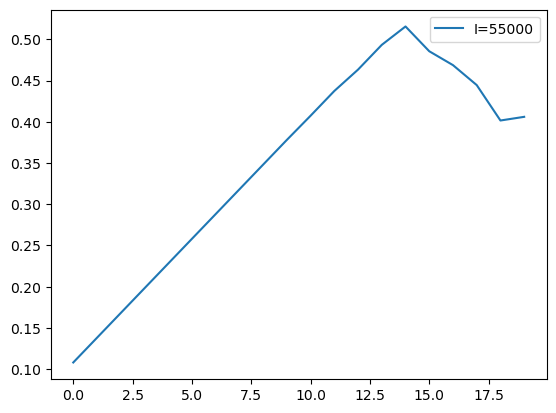

In [ ]:
#plt.plot(I_50000, label='I=50000')
#plt.plot(I_45000, label='I=45000')
plt.plot(agent_data.groupby(by='Step')['Worry'].mean(), label='I=55000')
plt.legend()

Text(0.5, 1.0, 'Flood measurement active (Step10)')

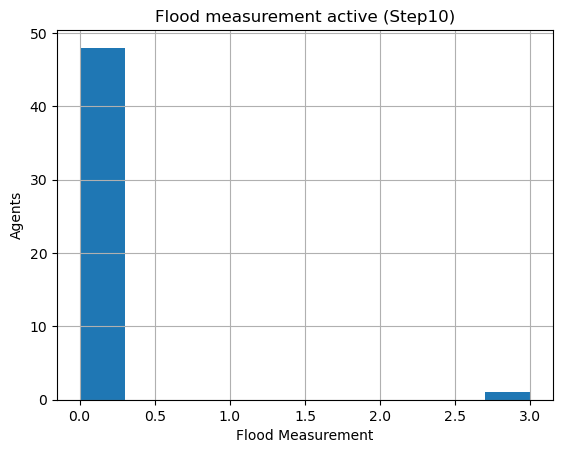

In [ ]:
agent_data.iloc[-500:-451]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step10)')

Text(0.5, 1.0, 'Flood measurement active (Step19)')

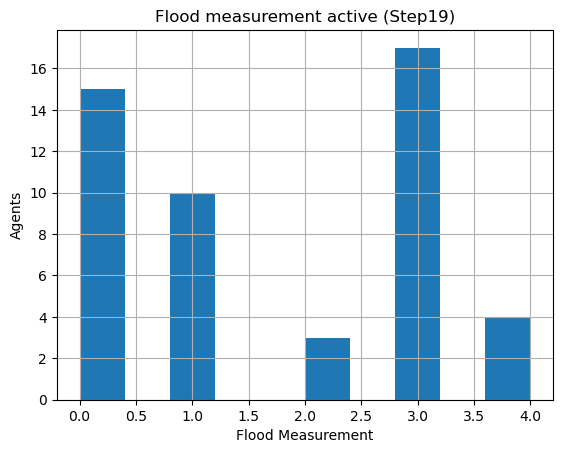

In [ ]:
agent_data.iloc[-50:-1]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step19)')

<Axes: xlabel='Step'>

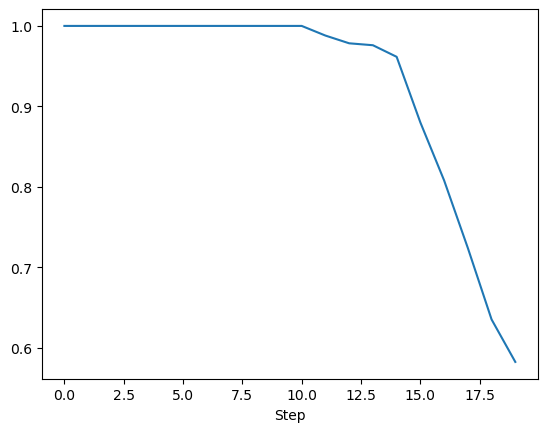

In [ ]:
agent_data.groupby(by='Step')['Costs'].mean().plot()

In [ ]:
agent_data.iloc[-50:-1]

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
19   0                   1.530743              0.722636          0.965838   
     1                   3.814957              0.882077          4.316002   
     2                   0.000000              0.000000          0.000000   
     3                   0.228233              0.390348          0.198609   
     4                   0.585140              0.554731          0.619125   
     5                   2.653606              0.818696          1.484402   
     6                   0.152546              0.320001          0.097806   
     7                   0.391543              0.484585          0.277233   
     8                   0.564526              0.548469          0.364513   
     9                   0.412193              0.493559          0.255212   
     10                  1.467283              0.715244          1.209396   
     11                  0.418296              0.496125          0.489594   
     12                  2.152538              0.782157          1.357194   
     13                  1.695288              0.740463          1.889808   
     14                  0.261464              0.414081          0.290840   
     15                  2.220078              0.787551          2.023810   
     16                  0.000000              0.000000          0.000000   
     17                  0.000000              0.000000          0.000000   
     18                  0.285610              0.429504          0.182108   
     19                  0.000000              0.000000          0.000000   
     20                  0.236736              0.396735          0.127297   
     21                  1.044640              0.655925          0.833224   
     22                  0.000000              0.000000          0.000000   
     23                  0.740810              0.595918          0.664287   
     24                  1.590050              0.729273          1.493184   
     25                  3.544714              0.869249          3.663059   
     26                  0.438880              0.504512          0.456681   
     27                  6.430780              1.000000          3.916466   
     28                  0.589340              0.555980          0.464577   
     29                  0.746432              0.597238          0.849396   
     30                  0.000000              0.000000          0.000000   
     31                  0.314808              0.446499          0.280688   
     32                  0.284512              0.428831          0.248664   
     33                  9.528980              1.000000         10.157796   
     34                  0.560402              0.547189          0.660919   
     35                  0.000000              0.000000          0.000000   
     36                  0.000000              0.000000          0.000000   
     37                  1.618317              0.732350          1.591689   
     38                  2.919415              0.835363          3.073462   
     39                  0.000000              0.000000          0.000000   
     40                  2.375935              0.799397          2.255461   
     41                  0.183597              0.352351          0.118976   
     42                  1.014252              0.650771          1.211719   
     43                  0.674477              0.579539          0.805444   
     44                  0.272747              0.421458          0.206743   
     45                  1.418207              0.709304          1.347473   
     46                  0.953215              0.639934          0.598121   
     47                  0.000000              0.000000          0.000000   
     48                  0.544874              0.542283          0.587595   

              FloodDamageActual  IsAdapted  FriendsCount  \
Step AgentID              

<Axes: >

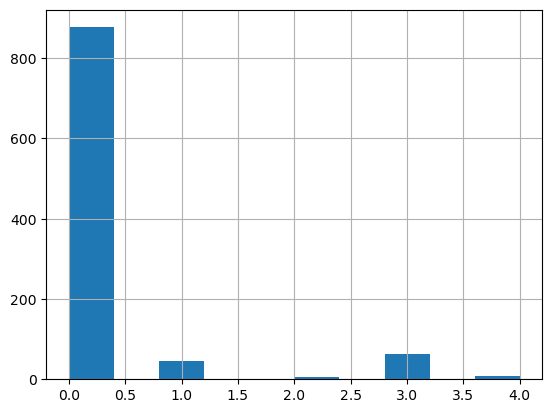

In [ ]:
#last round Adaptation measurements: (step19)
agent_data['Self_Adaption'].hist()
#worry needs to have higher impact 

In [ ]:
agent_data['FriendsCount']

Step  AgentID
0     0          2
      1          4
      2          6
      3          2
      4          6
                ..
19    45         2
      46         2
      47         4
      48         3
      49         5
Name: FriendsCount, Length: 1000, dtype: int64

<Axes: xlabel='Step'>

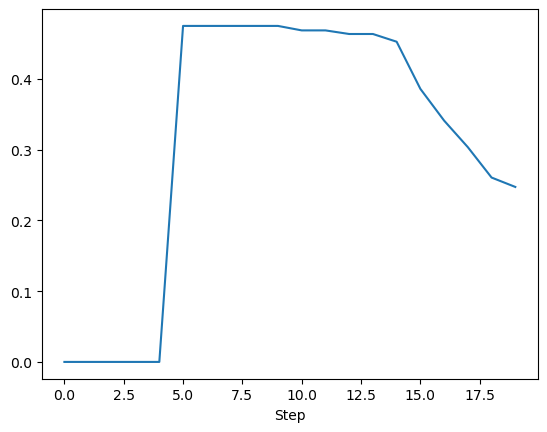

In [ ]:
agent_data.groupby(by='Step')['FloodDamageActual'].mean().plot()
#agent_data.groupby(by='Step')['A].mean().plot()

<Axes: xlabel='Step'>

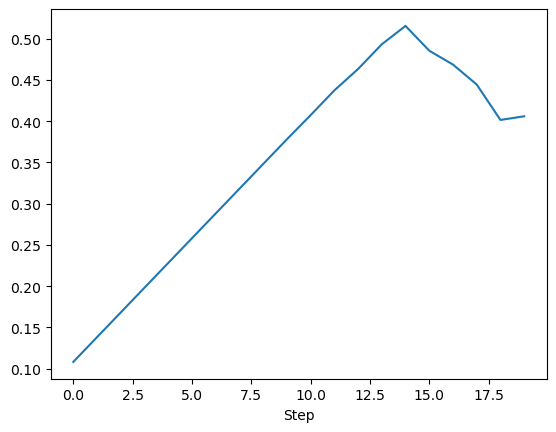

In [ ]:
agent_data.groupby(by='Step')['Worry'].mean().plot()

In [ ]:
agent_data.groupby(by='Step')['Self_Investment'].mean()


Step
0     0.000
1     0.000
2     0.000
3     0.000
4     0.000
5     0.000
6     0.000
7     0.000
8     0.000
9     0.000
10    0.008
11    0.008
12    0.016
13    0.016
14    0.032
15    0.120
16    0.192
17    0.264
18    0.332
19    0.356
Name: Self_Investment, dtype: float64

In [ ]:
agent_data.iloc[-100:-51]['FloodDamageActual'].mean()

0.2580152517875102

In [ ]:
agent_data.iloc[-500:-451]['FloodDamageActual'].mean()

0.4649623988330813

In [ ]:
agent_data.iloc[-600:-551]['FloodDamageActual'].mean()

0.4714139227439967

In [ ]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data
#change

total_adapted_households
0                          0
1                          0
2                          0
3                          0
4                          0
5                          0
6                          0
7                          0
8                          0
9                          0
10                         1
11                         1
12                         2
13                         2
14                         3
15                         9
16                        15
17                        23
18                        32
19                        35

Code Backlog

In [ ]:
import mesa

In [ ]:
params = {'number_of_households':50, 'flood_map_choice':"harvey", 'network':"watts_strogatz", 'I_threshold':50000, 'policy':1.0}

In [ ]:
results = mesa.batch_run(
    AdaptationModel,
    parameters=params,
    iterations=10,
    max_steps=20,
    number_processes=1,
    data_collection_period=1,  # Important, otherwise the datacollector will only collect data of the last time step
    display_progress=True,
)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 10.86it/s]


In [ ]:
results

[{'RunId': 0,
  'iteration': 0,
  'Step': 0,
  'number_of_households': 50,
  'flood_map_choice': 'harvey',
  'network': 'watts_strogatz',
  'I_threshold': 50000,
  'policy': 1.0,
  'total_adapted_households': 0,
  'AgentID': 0,
  'FloodDepthEstimated': 0.3043232,
  'FloodDamageEstimated': 0.44058449165889946,
  'FloodDepthActual': 0,
  'FloodDamageActual': 0,
  'IsAdapted': False,
  'FriendsCount': 5,
  'location': <POINT (302747.883 3299461.417)>,
  'Worry': 0.15532544023240566,
  'Self_Adaption': 0,
  'Self_Investment': 0,
  'Cum_Invest': 0,
  'Neighbours': None,
  'Income': 12133.66685253691,
  'Age': 47.343708211923506,
  'Costs': 1,
  'W2P': None},
 {'RunId': 0,
  'iteration': 0,
  'Step': 0,
  'number_of_households': 50,
  'flood_map_choice': 'harvey',
  'network': 'watts_strogatz',
  'I_threshold': 50000,
  'policy': 1.0,
  'total_adapted_households': 0,
  'AgentID': 1,
  'FloodDepthEstimated': 0.15711784,
  'FloodDamageEstimated': 0.32515745086755693,
  'FloodDepthActual': 0,
 

In [ ]:
results_df = pd.DataFrame(results)
print(f"Column names in the dataframe: {results_df.columns.tolist()}")

Column names in the dataframe: ['RunId', 'iteration', 'Step', 'number_of_households', 'flood_map_choice', 'network', 'I_threshold', 'policy', 'total_adapted_households', 'AgentID', 'FloodDepthEstimated', 'FloodDamageEstimated', 'FloodDepthActual', 'FloodDamageActual', 'IsAdapted', 'FriendsCount', 'location', 'Worry', 'Self_Adaption', 'Self_Investment', 'Cum_Invest', 'Neighbours', 'Income', 'Age', 'Costs', 'W2P']


In [ ]:
results_filtered  = results_df[['iteration', 'Step','AgentID', 'Worry', 'FloodDepthActual', 'IsAdapted', 'Self_Adaption', 'Cum_Invest']].reset_index(drop=True)
results_filtered.head(5)

iteration  Step  AgentID     Worry  FloodDepthActual  IsAdapted  \
0          0     0        0  0.155325               0.0      False   
1          0     0        1  0.000910               0.0      False   
2          0     0        2  0.213767               0.0      False   
3          0     0        3  0.009945               0.0      False   
4          0     0        4  0.157910               0.0      False   

   Self_Adaption  Cum_Invest  
0              0         0.0  
1              0         0.0  
2              0         0.0  
3              0         0.0  
4              0         0.0

In [ ]:
#filter for one agent 0 
results_agent_filtered = results_df[(results_df.AgentID == 0)]

In [ ]:
results_agent_filtered

RunId  iteration  Step  number_of_households flood_map_choice  \
0          0          0     0                    50           harvey   
50         0          0     1                    50           harvey   
100        0          0     2                    50           harvey   
150        0          0     3                    50           harvey   
200        0          0     4                    50           harvey   
...      ...        ...   ...                   ...              ...   
10250      9          9    16                    50           harvey   
10300      9          9    17                    50           harvey   
10350      9          9    18                    50           harvey   
10400      9          9    19                    50           harvey   
10450      9          9    20                    50           harvey   

              network  I_threshold  policy  total_adapted_households  AgentID  \
0      watts_strogatz        50000     1.0                         0        0   
50     watts_strogatz        50000     1.0                         0        0   
100    watts_strogatz        50000     1.0                         1        0   
150    watts_strogatz        50000     1.0                         1        0   
200    watts_strogatz        50000     1.0                         2        0   
...               ...          ...     ...                       ...      ...   
10250  watts_strogatz        50000     1.0                        24        0   
10300  watts_strogatz        50000     1.0                        34        0   
10350  watts_strogatz        50000     1.0                        40        0   
10400  watts_strogatz        50000     1.0                        45        0   
10450  watts_strogatz        50000     1.0                        49        0   

       ...                                       location     Worry  \
0      ...  POINT (302747.88255909656 3299461.4172029076)  0.155325   
50     ...  POINT (302747.88255909656 3299461.4172029076)  0.185325   
100    ...  POINT (302747.88255909656 3299461.4172029076)  0.215325   
150    ...  POINT (302747.88255909656 3299461.4172029076)  0.245325   
200    ...  POINT (302747.88255909656 3299461.4172029076)  0.275325   
...    ...                                            ...       ...   
10250  ...      POINT (246824.0289770668 3340285.5677151)  0.522412   
10300  ...      POINT (246824.0289770668 3340285.5677151)  0.552412   
10350  ...      POINT (246824.0289770668 3340285.5677151)  0.582412   
10400  ...      POINT (246824.0289770668 3340285.5677151)  0.100000   
10450  ...      POINT (246824.0289770668 3340285.5677151)  0.130000   

       Self_Adaption  Self_Investment  Cum_Invest  Neighbours        Income  \
0                  0              0.0         0.0        None  12133.666853   
50                 0              0.0         0.0        None  12133.666853   
100                0              0.0         0.0        None  12133.666853   
150                0              0.0         0.0        None  12133.666853   
200                0              0.0         0.0        None  12133.666853   
...              ...              ...         ...         ...           ...   
10250              0              0.0         0.0        None  72593.634665   
10300              0              0.0         0.2        None  72593.634665   
10350              0              0.0         1.0        None  72593.634665   
10400              1              0.8         1.8        None  72593.634665   
10450              1              0.8         1.8        None  72593.634665   

             Age  Costs   W2P  
0      47.343708   1.00  None  
50     47.343708   1.00  None  
100    47.343708   1.00  None  
150    47.343708   1.00  None  
200    47.343708   1.00  None  
...          ...    ...   ...  
10250  47.342166   1.00  None  
10300  47.342166   0.94  None  
10350  47.342166   0.70  None  
10400  47.342166   0.46  None  
10450  47.34216

In [ ]:
result_agent_long = results_agent_filtered.T.unstack().reset_index()
result_agent_long.columns = ["Step", "AgentID", "Variable", "Value"]
result_agent_long

level_0               level_1             0
0           0                 RunId             0
1           0             iteration             0
2           0                  Step             0
3           0  number_of_households            50
4           0      flood_map_choice        harvey
...       ...                   ...           ...
5455    10450            Neighbours          None
5456    10450                Income  72593.634665
5457    10450                   Age     47.342166
5458    10450                 Costs          0.46
5459    10450                   W2P          None

[5460 rows x 3 columns]

In [ ]:
results_filtered

iteration  Step  AgentID     Worry  FloodDepthActual  IsAdapted  \
0          0     0        0  0.155325               0.0      False   
1          0     0        1  0.000910               0.0      False   
2          0     0        2  0.213767               0.0      False   
3          0     0        3  0.009945               0.0      False   
4          0     0        4  0.157910               0.0      False   

   Self_Adaption  Cum_Invest  
0              0         0.0  
1              0         0.0  
2              0         0.0  
3              0         0.0  
4              0         0.0

C:\Users\thoma\AppData\Local\Temp\ipykernel_6060\2039980316.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(


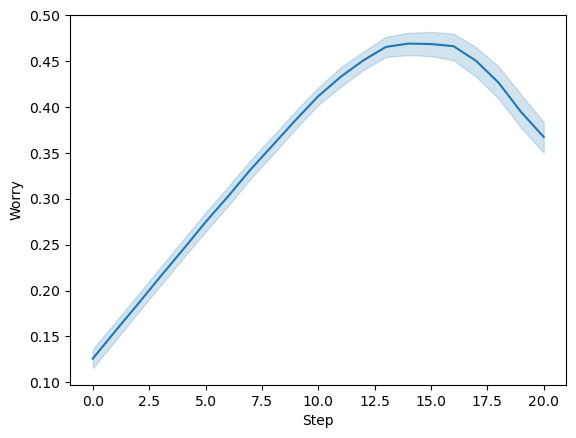

In [ ]:
g = sns.lineplot(
    data=results_filtered,
    x="Step",
    y="Worry",
    errorbar=("ci", 95),
    palette="tab10",
)